<a href="https://colab.research.google.com/github/siddartha-hub/Genarative--AI/blob/main/LAB_7_3(2303a52062)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/diabetes (1).xls')
print(f"Shape of the DataFrame: {df.shape}")
display(df.head())

Shape of the DataFrame: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print("Data Shape and Types:")
print(df.info())

print("\nMissing Values:")
missing_values = df.isnull().sum()

Data Shape and Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing Values:


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_to_clean:
    median_val = df[df[col] != 0][col].median()
    df[col] = df[col].replace(0, median_val)
print(df[columns_to_clean].isin([0]).sum())
display(df.head())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
display(X_train.head())
display(X_test.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.851355,-1.056427,-0.826740,-1.918187,-1.203361,-0.769477,0.310794,-0.792169
1,0.356576,0.144399,0.477772,-0.229874,-1.470195,-0.417498,-0.116439,0.561034
2,-0.549372,-0.556083,-1.152868,1.233330,-0.555335,0.359790,-0.764862,-0.707594
3,-0.851355,0.811525,-1.315932,-0.004766,-0.161437,-0.402832,0.262314,-0.369293
4,-1.153338,-0.889646,-0.663676,1.120776,-0.415565,1.782373,-0.337630,-0.961320


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.960541,1.245157,-0.663676,-0.004766,-0.161437,-0.740145,-0.555791,0.561034
1,1.866489,-1.790266,2.760669,-0.680091,-1.127122,0.447785,-0.583061,1.153060
2,-0.549372,0.010974,0.314708,-0.229874,0.791541,0.506448,0.016882,-0.623019
3,0.960541,-0.255876,-0.663676,-0.004766,-0.161437,-0.740145,0.771356,0.053583
4,-0.549372,-1.590128,-0.011420,-0.004766,-0.161437,-0.021521,-1.137554,-0.961320


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(12, activation='swish', input_shape=(X_train.shape[1],)))
model.add(Dense(25, activation='swish'))
model.add(Dense(15, activation='swish'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

model.save("diabetes_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6829 - loss: 0.6739 - val_accuracy: 0.6260 - val_loss: 0.6835
Epoch 2/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6798 - loss: 0.6743 - val_accuracy: 0.6423 - val_loss: 0.6804
Epoch 3/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7128 - loss: 0.6679 - val_accuracy: 0.6423 - val_loss: 0.6777
Epoch 4/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6988 - loss: 0.6707 - val_accuracy: 0.6504 - val_loss: 0.6750
Epoch 5/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7214 - loss: 0.6644 - val_accuracy: 0.6585 - val_loss: 0.6725
Epoch 6/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7525 - loss: 0.6595 - val_accuracy: 0.6504 - val_loss: 0.6701
Epoch 7/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7253 - loss: 0.6599 - val_accuracy: 0.6504 - val_loss: 0.6677
Epoch 8/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7168 - loss: 0.6621 - val_accuracy: 0.6504 - 

ValueError: Unable to synchronously create dataset (name already exists)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
Test Accuracy: 0.7078
Confusion Matrix:
[[81 19]
 [26 28]]
Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.76      0.81      0.78       100
    Diabetic       0.60      0.52      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



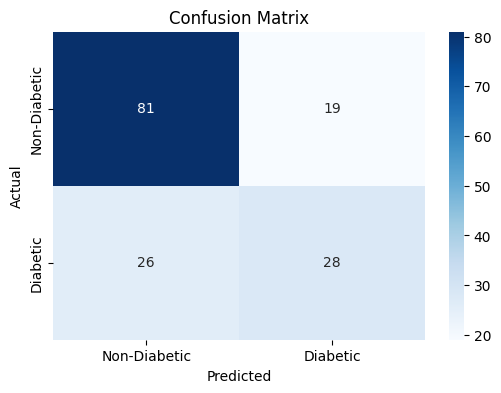

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = keras.models.load_model("diabetes_model.h5")

y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred, target_names=["Non-Diabetic", "Diabetic"])
print("Classification Report:")
print(report)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()